# Importar Librerías

In [1]:
import cv2
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU

# Cargar set de Imágenes

In [3]:
dirname = os.path.join(os.getcwd(),'Dataset')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            if(len(image.shape)==3):
                
                images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  c:\Users\mapf_\Documents\Semestre9\IA\Python\ProyectoFlores\Dataset\
c:\Users\mapf_\Documents\Semestre9\IA\Python\ProyectoFlores\Dataset\floripondio 1
c:\Users\mapf_\Documents\Semestre9\IA\Python\ProyectoFlores\Dataset\girasol 3725
c:\Users\mapf_\Documents\Semestre9\IA\Python\ProyectoFlores\Dataset\margarita 4269
c:\Users\mapf_\Documents\Semestre9\IA\Python\ProyectoFlores\Dataset\nochebuena 5337
c:\Users\mapf_\Documents\Semestre9\IA\Python\ProyectoFlores\Dataset\rosa 3064
Directorios leidos: 5
Imagenes en cada directorio [3726, 4269, 5337, 3064, 4268]
suma Total de imagenes en subdirs: 20664


# Creamos las etiquetas

In [4]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))


Cantidad etiquetas creadas:  20664


In [5]:
flowers=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    flowers.append(name[len(name)-1])
    indice=indice+1

0 floripondio
1 girasol
2 margarita
3 nochebuena
4 rosa


In [6]:
target_shape = (28, 21)

images = [cv2.resize(img, target_shape) for img in images]

#y = np.array(labels)
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy

# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [0 1 2 3 4]


# Creamos Sets de Entrenamiento y Test

In [7]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (16531, 21, 28, 3) (16531,)
Testing data shape :  (4133, 21, 28, 3) (4133,)


Text(0.5, 1.0, 'Ground Truth : 1')

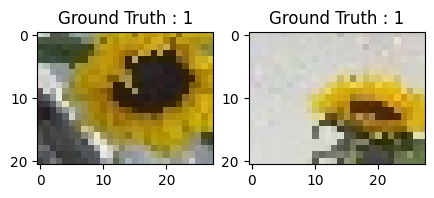

In [8]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesamos las imagenes

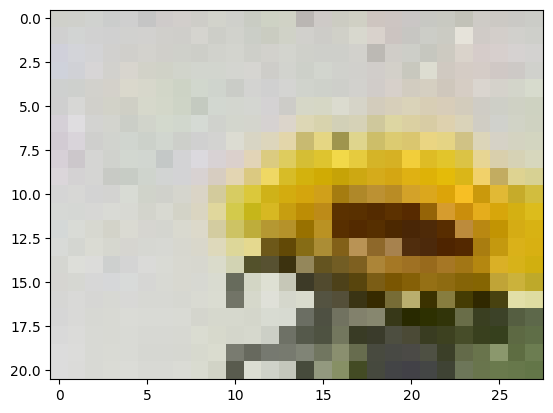

In [9]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.
plt.imshow(test_X[0,:,:])

## Hacemos el One-hot Encoding para la red

In [10]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 1
After conversion to one-hot: [0. 1. 0. 0. 0.]


# Creamos el Set de Entrenamiento y Validación

In [11]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [12]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(13224, 21, 28, 3) (3307, 21, 28, 3) (13224, 5) (3307, 5)


# Creamos el modelo de CNN

In [13]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 50 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 50 # cantidad de imágenes que se toman a la vez en memoria

In [14]:
flower_model = Sequential()
flower_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(21,28,3)))
flower_model.add(LeakyReLU(alpha=0.1))
flower_model.add(MaxPooling2D((2, 2),padding='same'))
flower_model.add(Dropout(0.5))

flower_model.add(Flatten())
flower_model.add(Dense(32, activation='linear'))
flower_model.add(LeakyReLU(alpha=0.1))
flower_model.add(Dropout(0.5))
flower_model.add(Dense(nClasses, activation='softmax'))

In [15]:
flower_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 21, 28, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 21, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 11, 14, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 11, 14, 32)        0         
                                                                 
 flatten (Flatten)           (None, 4928)              0         
                                                                 
 dense (Dense)               (None, 32)                157728    
                                                        

In [16]:
flower_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

# Entrenamos el modelo: Aprende a clasificar imágenes

In [17]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
flower_train = flower_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/50


265/265 [==============================] - 4s 11ms/step - loss: 1.6127 - accuracy: 0.2461 - val_loss: 1.5770 - val_accuracy: 0.4288
Epoch 2/50
265/265 [==============================] - 2s 9ms/step - loss: 1.5715 - accuracy: 0.2852 - val_loss: 1.5273 - val_accuracy: 0.4239
Epoch 3/50
265/265 [==============================] - 2s 9ms/step - loss: 1.5349 - accuracy: 0.3189 - val_loss: 1.4761 - val_accuracy: 0.5104
Epoch 4/50
265/265 [==============================] - 2s 9ms/step - loss: 1.4929 - accuracy: 0.3558 - val_loss: 1.4128 - val_accuracy: 0.6217
Epoch 5/50
265/265 [==============================] - 2s 9ms/step - loss: 1.4481 - accuracy: 0.3882 - val_loss: 1.3471 - val_accuracy: 0.6447
Epoch 6/50
265/265 [==============================] - 2s 9ms/step - loss: 1.4058 - accuracy: 0.4138 - val_loss: 1.2844 - val_accuracy: 0.6816
Epoch 7/50
265/265 [==============================] - 2s 9ms/step - loss: 1.3620 - accuracy: 0.4381 - val_loss: 1.2155 - val_accuracy: 0.6774
Epo

In [18]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
flower_model.save("C:\\Users\\mapf_\\Documents\\Semestre9\\IA\\Python\\ProyectoFlores\\redesN\\redesN.h5py")

INFO:tensorflow:Assets written to: C:\Users\mapf_\Documents\Semestre9\IA\Python\ProyectoFlores\redesN\redesN.h5py\assets


INFO:tensorflow:Assets written to: C:\Users\mapf_\Documents\Semestre9\IA\Python\ProyectoFlores\redesN\redesN.h5py\assets


# Evaluamos la red

In [19]:
test_eval = flower_model.evaluate(test_X, test_Y_one_hot, verbose=1)

130/130 [==============================] - 1s 4ms/step - loss: 0.4040 - accuracy: 0.8969


In [20]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.4040246903896332
Test accuracy: 0.8969271779060364


In [21]:
flower_train.history

{'loss': [1.6126803159713745,
  1.5714733600616455,
  1.5349076986312866,
  1.4928597211837769,
  1.4480869770050049,
  1.4057751893997192,
  1.361956238746643,
  1.3132752180099487,
  1.2778022289276123,
  1.2233589887619019,
  1.1849374771118164,
  1.1527128219604492,
  1.1081339120864868,
  1.0691258907318115,
  1.0370004177093506,
  1.0042058229446411,
  0.9748592972755432,
  0.9530702829360962,
  0.9252519011497498,
  0.9058740139007568,
  0.883874237537384,
  0.8571635484695435,
  0.8413487076759338,
  0.8261345624923706,
  0.816336989402771,
  0.803523600101471,
  0.7800542116165161,
  0.7648125290870667,
  0.7509228587150574,
  0.7404084205627441,
  0.7310235500335693,
  0.7219654321670532,
  0.7122853398323059,
  0.6938612461090088,
  0.6837471127510071,
  0.6790934205055237,
  0.6704851984977722,
  0.660995364189148,
  0.645965576171875,
  0.6464540958404541,
  0.6359617114067078,
  0.6359971165657043,
  0.6224002838134766,
  0.6111558675765991,
  0.6048034429550171,
  0.5930

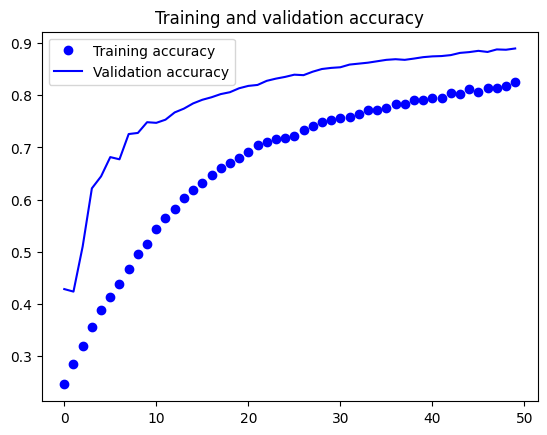

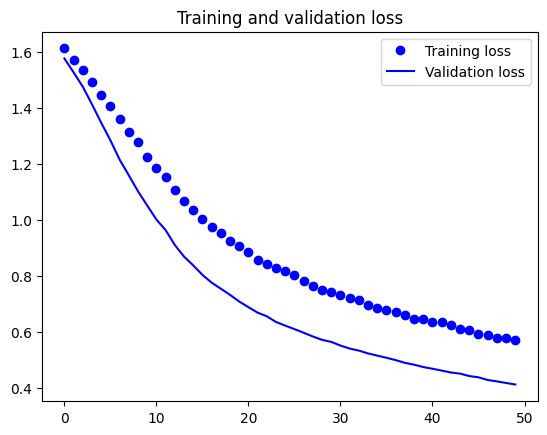

In [22]:
accuracy = flower_train.history['accuracy']
val_accuracy = flower_train.history['val_accuracy']
loss = flower_train.history['loss']
val_loss = flower_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [23]:
predicted_classes2 = flower_model.predict(test_X)

130/130 [==============================] - 1s 4ms/step


In [24]:
predicted_classes=[]
for predicted_flower in predicted_classes2:
    predicted_classes.append(predicted_flower.tolist().index(max(predicted_flower)))
predicted_classes=np.array(predicted_classes)

In [25]:
predicted_classes.shape, test_Y.shape

((4133,), (4133,))

# Aprendamos de los errores: Qué mejorar

Found 3707 correct labels


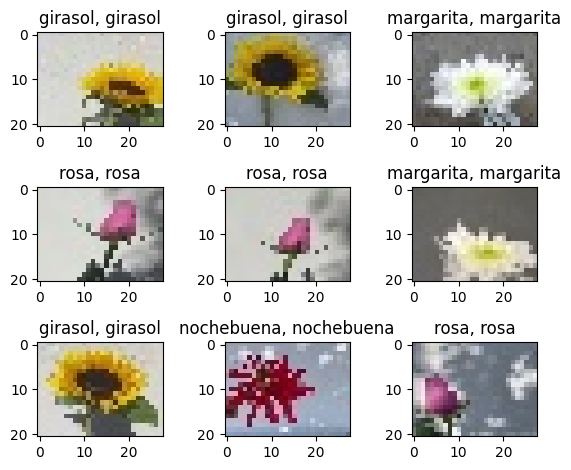

In [26]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(21,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(flowers[predicted_classes[correct]],
                                                    flowers[test_Y[correct]]))

    plt.tight_layout()

Found 426 incorrect labels


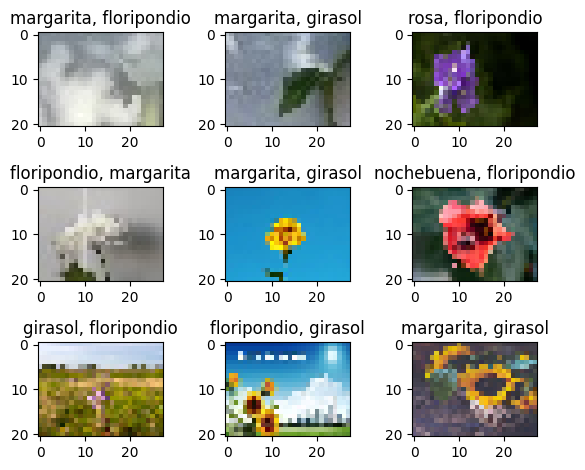

In [27]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(21,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(flowers[predicted_classes[incorrect]],
                                                    flowers[test_Y[incorrect]]))
    plt.tight_layout()

In [28]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.85      0.77      0.81       750
     Class 1       0.93      0.96      0.94       865
     Class 2       0.91      0.95      0.93      1100
     Class 3       0.91      0.95      0.93       617
     Class 4       0.87      0.83      0.85       801

    accuracy                           0.90      4133
   macro avg       0.89      0.89      0.89      4133
weighted avg       0.90      0.90      0.90      4133



1/1 [==============================] - 0s 118ms/step


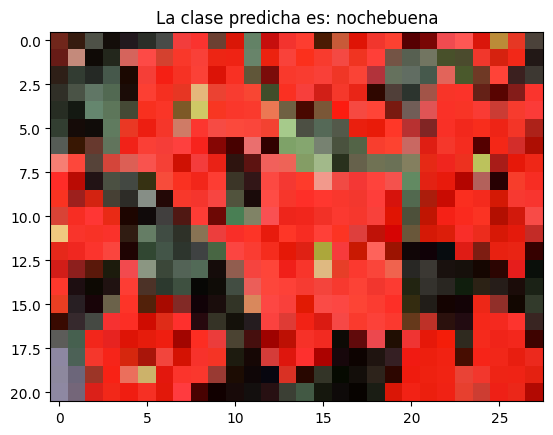

In [40]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
# Cargar el modelo desde el archivo HDF5
entregaFlowers_model = load_model('C:\\Users\\mapf_\\Documents\\Semestre9\\IA\\Python\\ProyectoFlores\\redesN\\redesN.h5py')
# Cargar la imagen con OpenCV
img = cv2.imread('C:\\Users\\mapf_\\Downloads\\fotos\\noche3.jpeg')
img = cv2.resize(img, (28, 21))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_array = np.array(img)
img_array = np.expand_dims(img_array, axis=0)

img_array = img_array.astype('float32')
img_array = img_array / 255.

# Realizar la predicción
predicted_class = entregaFlowers_model.predict(img_array)
clase_predicha = np.argmax(predicted_class)

# Obtener el nombre de la clase predicha (asumiendo que tienes un diccionario class_names) # Reemplaza con tu diccionario
nombre_clase_predicha = flowers[clase_predicha]

# Mostrar la imagen con el nombre de la clase predicha
plt.imshow(img_array[0, :, :])
plt.title("La clase predicha es: "+ nombre_clase_predicha, fontsize=12)
plt.show()